# BRFSS 2024 Diabetes Analysis - Exploratory Data Analysis

This notebook explores diabetes risk factors in the BRFSS 2024 dataset, with a focus on:
- Traditional risk factors (BMI, age, demographics)
- **Novel/underexplored factors**: mental health, social determinants, healthcare access

Dataset: LLCP2024.csv (457,671 observations, 301 variables)

## 1. Setup and Data Loading

In [48]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


In [49]:
# Load data
print("Loading BRFSS 2024 data...")
df = pd.read_csv('LLCP2024_cleaned.csv')

print(f"Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")

Loading BRFSS 2024 data...
Data loaded successfully!
Shape: (457670, 301)
Rows: 457,670
Columns: 301


## 2. Initial Data Overview

In [50]:
# Display first few rows
df.head()

_STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     2.0  2282024     2.0  28.0   2024    1100.0  2024000001   
1     1.0     2.0  2212024     2.0  21.0   2024    1100.0  2024000002   
2     1.0     2.0  2212024     2.0  21.0   2024    1100.0  2024000003   
3     1.0     2.0  2282024     2.0  28.0   2024    1100.0  2024000004   
4     1.0     2.0  2212024     2.0  21.0   2024    1100.0  2024000005   

           _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHON1  LADULT1  \
0  2.024000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
1  2.024000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
2  2.024000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
3  2.024000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
4  2.024000e+09       1.0       1.0       NaN       1.0       2.0      1.0   

   NUMADULT  RESPSLC1  LANDSEX3  SAFETIME  CTELNUM1  CELLFON5  CADULT1  \
0       1.0       NaN       2.0       NaN       NaN       NaN      NaN   
1       2.0       1.0       1.0       NaN       NaN       NaN      NaN   
2       3.0       1.0       1.0       NaN       NaN       NaN      NaN   
3       1.0       NaN       1.0       NaN       NaN       NaN      NaN   
4       3.0       1.0       1.0       NaN       NaN       NaN      NaN   

   CELLSEX3  PVTRESD3  CCLGHOUS  CSTATE1  LANDLINE  HHADULT  SEXVAR  GENHLTH  \
0       NaN       NaN       NaN      NaN       NaN      NaN     2.0      3.0   
1       NaN       NaN       NaN      NaN       NaN      NaN     1.0      1.0   
2       NaN       NaN       NaN      NaN       NaN      NaN     1.0      2.0   
3       NaN       NaN       NaN      NaN       NaN      NaN     1.0      1.0   
4       NaN       NaN       NaN      NaN       NaN      NaN     1.0      3.0   

   PHYSHLTH  MENTHLTH  POORHLTH  PRIMINS2  PERSDOC3  MEDCOST1  CHECKUP1  \
0       2.0      88.0      88.0       3.0       2.0       2.0       1.0   
1      88.0      88.0       NaN       3.0       1.0       2.0       1.0   
2      30.0      88.0       1.0       1.0       3.0       1.0       4.0   
3      88.0      88.0       NaN       3.0       1.0       2.0       1.0   
4      88.0      88.0       NaN       5.0       1.0       2.0       1.0   

   EXERANY2  LASTDEN4  RMVTETH4  CVDINFR4  CVDCRHD4  CVDSTRK3  ASTHMA3  \
0       1.0       1.0       1.0       2.0       2.0       2.0      2.0   
1       1.0       1.0       1.0       2.0       1.0       2.0      2.0   
2       1.0       4.0       2.0       2.0       2.0       2.0      2.0   
3       1.0       1.0       8.0       2.0       2.0       2.0      2.0   
4       2.0       1.0       1.0       2.0       2.0       2.0      2.0   

   ASTHNOW  CHCSCNC1  CHCOCNC1  CHCCOPD3  ADDEPEV3  CHCKDNY2  ...  _AGE65YR  \
0      NaN       1.0       2.0       2.0       2.0       2.0  ...       2.0   
1      NaN       2.0       2.0       2.0       2.0       2.0  ...       2.0   
2      NaN       2.0       2.0       2.0       2.0       2.0  ...       1.0   
3      NaN       1.0       2.0       2.0       2.0       2.0  ...       2.0   
4      NaN       2.0       2.0       2.0       2.0       2.0  ...       1.0   

   _AGE80  _AGE_G  HTIN4   HTM4   WTKG3   _BMI5  _BMI5CAT  _RFBMI5  _CHLDCNT  \
0    78.0     6.0   64.0  163.0  5942.0  2249.0       2.0      1.0       1.0   
1    80.0     6.0   70.0  178.0  8165.0  2583.0       3.0      2.0       1.0   
2    59.0     5.0   78.0  198.0  8845.0  2253.0       2.0      1.0       1.0   
3    80.0     6.0   68.0  173.0  7484.0  2509.0       3.0      2.0       1.0   
4    47.0     4.0   68.0  173.0  5897.0  1977.0       2.0      1.0       1.0   

   _EDUCAG  _INCOMG1  _RFMAM23  _MAM402Y  _CRVSCRN  _RFPAP37  _HPV5YR1  \
0      2.0       9.0       1.0       NaN       1.0       NaN       NaN   
1      4.0       7.0       NaN       NaN       NaN       NaN       NaN   
2      3.0       9.0       NaN       NaN       NaN       NaN       NaN   
3      4.0       4.0 

In [51]:
# Basic statistics on key variables
key_vars = ['DIABETE4', '_BMI5CAT', '_AGE_G', '_SEX', '_RACE', 'GENHLTH']
print("Summary of key variables:")
for var in key_vars:
    if var in df.columns:
        print(f"\n{var}:")
        print(df[var].value_counts().head())

Summary of key variables:

DIABETE4:
DIABETE4
3.0    376125
1.0     65809
4.0     11307
2.0      3395
7.0       798
Name: count, dtype: int64

_BMI5CAT:
_BMI5CAT
3.0    146563
4.0    139640
2.0    121053
1.0      7377
Name: count, dtype: int64

_AGE_G:
_AGE_G
6.0    172826
5.0     80280
4.0     64458
3.0     60418
2.0     49994
Name: count, dtype: int64

_SEX:
_SEX
2.0    240163
1.0    217507
Name: count, dtype: int64

_RACE:
_RACE
1.0    329346
8.0     48646
2.0     35172
4.0     12646
7.0     10486
Name: count, dtype: int64

GENHLTH:
GENHLTH
3.0    156229
2.0    145791
4.0     67919
1.0     64217
5.0     22204
Name: count, dtype: int64


## 3. Diabetes Outcome Variable Analysis

In [52]:
# Analyze DIABETE4 - main outcome variable
print("="*80)
print("DIABETES STATUS (DIABETE4)")
print("="*80)
print("\nValue counts:")
print(df['DIABETE4'].value_counts().sort_index())

print("\nValue distribution (%):")
print((df['DIABETE4'].value_counts(normalize=True).sort_index() * 100).round(2))

# Code meanings:
# 1 = Yes (diabetes)
# 2 = Yes, but only during pregnancy (gestational)
# 3 = No
# 4 = No, pre-diabetes or borderline
# 7 = Don't know/Not sure
# 9 = Refused

DIABETES STATUS (DIABETE4)

Value counts:
DIABETE4
1.0     65809
2.0      3395
3.0    376125
4.0     11307
7.0       798
9.0       232
Name: count, dtype: int64

Value distribution (%):
DIABETE4
1.0    14.38
2.0     0.74
3.0    82.18
4.0     2.47
7.0     0.17
9.0     0.05
Name: proportion, dtype: float64


In [53]:
# Create diabetes categories
def categorize_diabetes(x):
    if x == 1:
        return 'Diabetes'
    elif x == 2:
        return 'Gestational'
    elif x == 3:
        return 'No Diabetes'
    elif x == 4:
        return 'Prediabetes'
    else:
        return np.nan

df['diabetes_status'] = df['DIABETE4'].apply(categorize_diabetes)

# Binary outcome (1 = diabetes, 0 = no diabetes)
df['has_diabetes'] = df['DIABETE4'].apply(lambda x: 1 if x == 1 else (0 if x == 3 else np.nan))

print("Diabetes Status Categories:")
print(df['diabetes_status'].value_counts())
print("\nPercentages:")
print((df['diabetes_status'].value_counts(normalize=True) * 100).round(2))

Diabetes Status Categories:
diabetes_status
No Diabetes    376125
Diabetes        65809
Prediabetes     11307
Gestational      3395
Name: count, dtype: int64

Percentages:
diabetes_status
No Diabetes    82.37
Diabetes       14.41
Prediabetes     2.48
Gestational     0.74
Name: proportion, dtype: float64


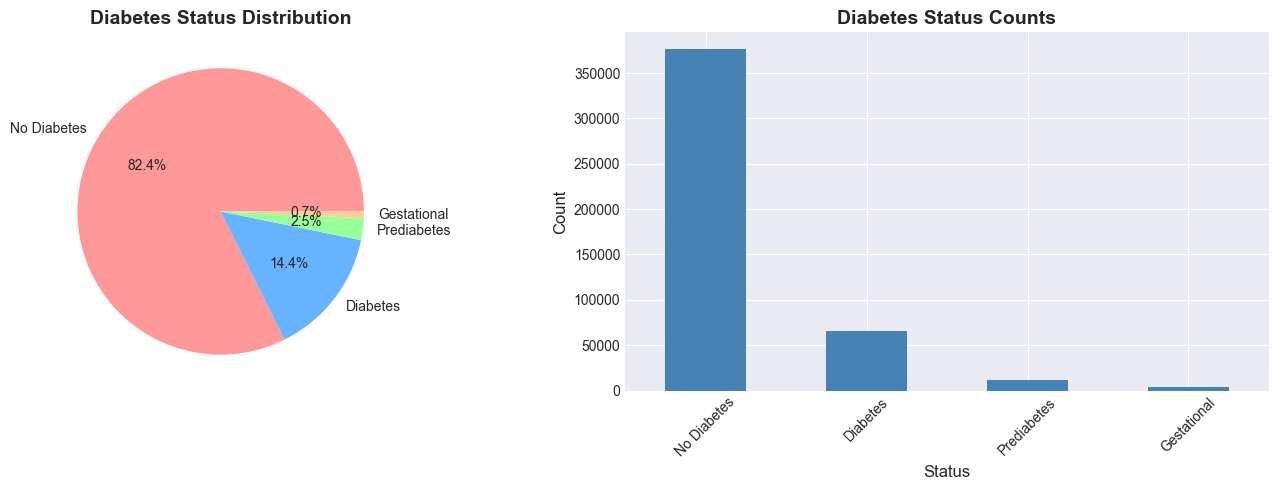


Diabetes Prevalence (excluding gestational/prediabetes/missing): 14.89%


In [54]:
# Visualize diabetes distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
df['diabetes_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], 
                                           colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[0].set_title('Diabetes Status Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

# Bar chart
df['diabetes_status'].value_counts().plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('Diabetes Status Counts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Status', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate diabetes prevalence
diabetes_prev = (df['DIABETE4'] == 1).sum() / len(df[df['DIABETE4'].isin([1, 3])]) * 100
print(f"\nDiabetes Prevalence (excluding gestational/prediabetes/missing): {diabetes_prev:.2f}%")

## 4. Traditional Risk Factors Analysis

### 4.1 BMI (Body Mass Index)

In [55]:
# BMI analysis
print("BMI Categories:")
print(df['_BMI5CAT'].value_counts().sort_index())
# 1 = Underweight, 2 = Normal, 3 = Overweight, 4 = Obese

# Map BMI categories
bmi_map = {1: 'Underweight', 2: 'Normal', 3: 'Overweight', 4: 'Obese'}
df['bmi_category'] = df['_BMI5CAT'].map(bmi_map)

# BMI by diabetes status
print("\nBMI Distribution by Diabetes Status (%):")
crosstab_bmi = pd.crosstab(df['bmi_category'], df['diabetes_status'], normalize='columns') * 100
print(crosstab_bmi.round(2))

BMI Categories:
_BMI5CAT
1.0      7377
2.0    121053
3.0    146563
4.0    139640
Name: count, dtype: int64

BMI Distribution by Diabetes Status (%):
diabetes_status  Diabetes  Gestational  No Diabetes  Prediabetes
bmi_category                                                    
Normal              15.11        27.67        32.09        16.75
Obese               52.07        39.76        29.88        49.67
Overweight          32.08        31.03        36.05        32.45
Underweight          0.74         1.54         1.98         1.13


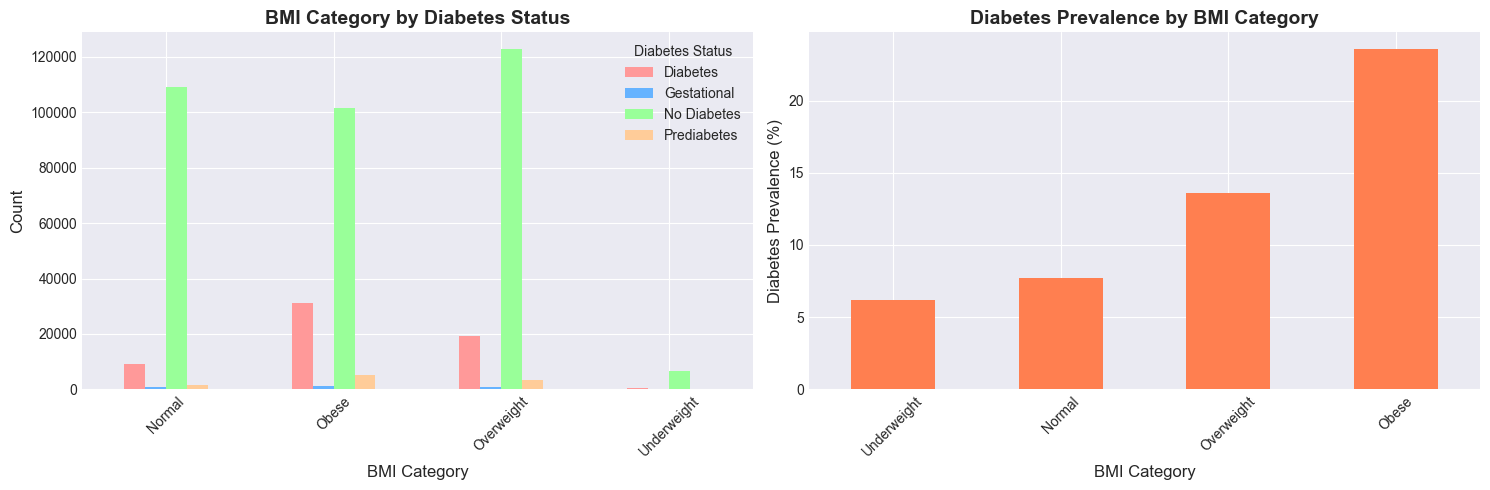

In [56]:
# Visualize BMI vs Diabetes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Grouped bar chart
crosstab_counts = pd.crosstab(df['bmi_category'], df['diabetes_status'])
crosstab_counts.plot(kind='bar', ax=axes[0], color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
axes[0].set_title('BMI Category by Diabetes Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('BMI Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Diabetes Status')
axes[0].tick_params(axis='x', rotation=45)

# Diabetes prevalence by BMI
bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese']
diabetes_by_bmi = df.groupby('bmi_category')['has_diabetes'].mean().reindex(bmi_order) * 100
diabetes_by_bmi.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Diabetes Prevalence by BMI Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('BMI Category', fontsize=12)
axes[1].set_ylabel('Diabetes Prevalence (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Age

In [57]:
# Age analysis
print("Age Groups (_AGE_G):")
print(df['_AGE_G'].value_counts().sort_index())
# 1 = 18-24, 2 = 25-34, 3 = 35-44, 4 = 45-54, 5 = 55-64, 6 = 65+

age_map = {1: '18-24', 2: '25-34', 3: '35-44', 4: '45-54', 5: '55-64', 6: '65+'}
df['age_group'] = df['_AGE_G'].map(age_map)

# Diabetes prevalence by age
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
diabetes_by_age = df.groupby('age_group')['has_diabetes'].mean().reindex(age_order) * 100
print("\nDiabetes Prevalence by Age Group (%):")
print(diabetes_by_age.round(2))

Age Groups (_AGE_G):
_AGE_G
1.0     29694
2.0     49994
3.0     60418
4.0     64458
5.0     80280
6.0    172826
Name: count, dtype: int64

Diabetes Prevalence by Age Group (%):
age_group
18-24     1.43
25-34     2.48
35-44     5.93
45-54    13.26
55-64    19.24
65+      22.60
Name: has_diabetes, dtype: float64


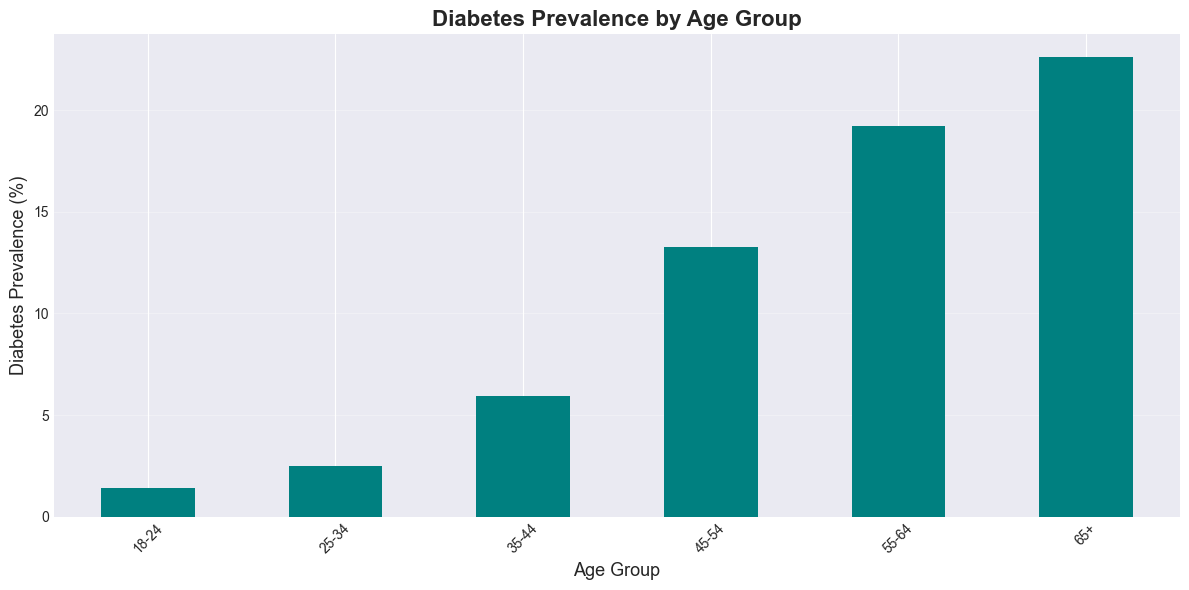

In [58]:
# Visualize age vs diabetes
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

diabetes_by_age.plot(kind='bar', ax=ax, color='teal')
ax.set_title('Diabetes Prevalence by Age Group', fontsize=16, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=13)
ax.set_ylabel('Diabetes Prevalence (%)', fontsize=13)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Demographics (Sex, Race, Income, Education)

In [59]:
# Sex
sex_map = {1: 'Male', 2: 'Female'}
df['sex'] = df['_SEX'].map(sex_map)

print("Diabetes Prevalence by Sex (%):")
print((df.groupby('sex')['has_diabetes'].mean() * 100).round(2))

# Race
race_map = {
    1: 'White', 2: 'Black', 3: 'Native American', 4: 'Asian',
    5: 'Pacific Islander', 6: 'Other', 7: 'Multiracial',
    8: 'Hispanic', 9: 'Refused'
}
df['race'] = df['_RACE'].map(race_map)

print("\nDiabetes Prevalence by Race (%):")
print((df.groupby('race')['has_diabetes'].mean().sort_values(ascending=False) * 100).round(2))

# Income
income_map = {
    1: '<$15k', 2: '$15k-$25k', 3: '$25k-$35k', 4: '$35k-$50k',
    5: '$50k-$100k', 6: '$100k-$200k', 7: '>$200k', 9: 'Unknown'
}
df['income_group'] = df['_INCOMG1'].map(income_map)

print("\nDiabetes Prevalence by Income (%):")
print((df.groupby('income_group')['has_diabetes'].mean().sort_values(ascending=False) * 100).round(2))

Diabetes Prevalence by Sex (%):
sex
Female    14.32
Male      15.51
Name: has_diabetes, dtype: float64

Diabetes Prevalence by Race (%):
race
Native American     21.96
Black               21.35
Pacific Islander    20.31
Other               16.12
Refused             15.57
White               14.29
Hispanic            14.11
Multiracial         14.05
Asian               11.23
Name: has_diabetes, dtype: float64

Diabetes Prevalence by Income (%):
income_group
$15k-$25k      23.49
<$15k          22.50
$25k-$35k      19.61
$35k-$50k      17.45
Unknown        14.67
$50k-$100k     14.01
$100k-$200k    10.06
>$200k          6.89
Name: has_diabetes, dtype: float64


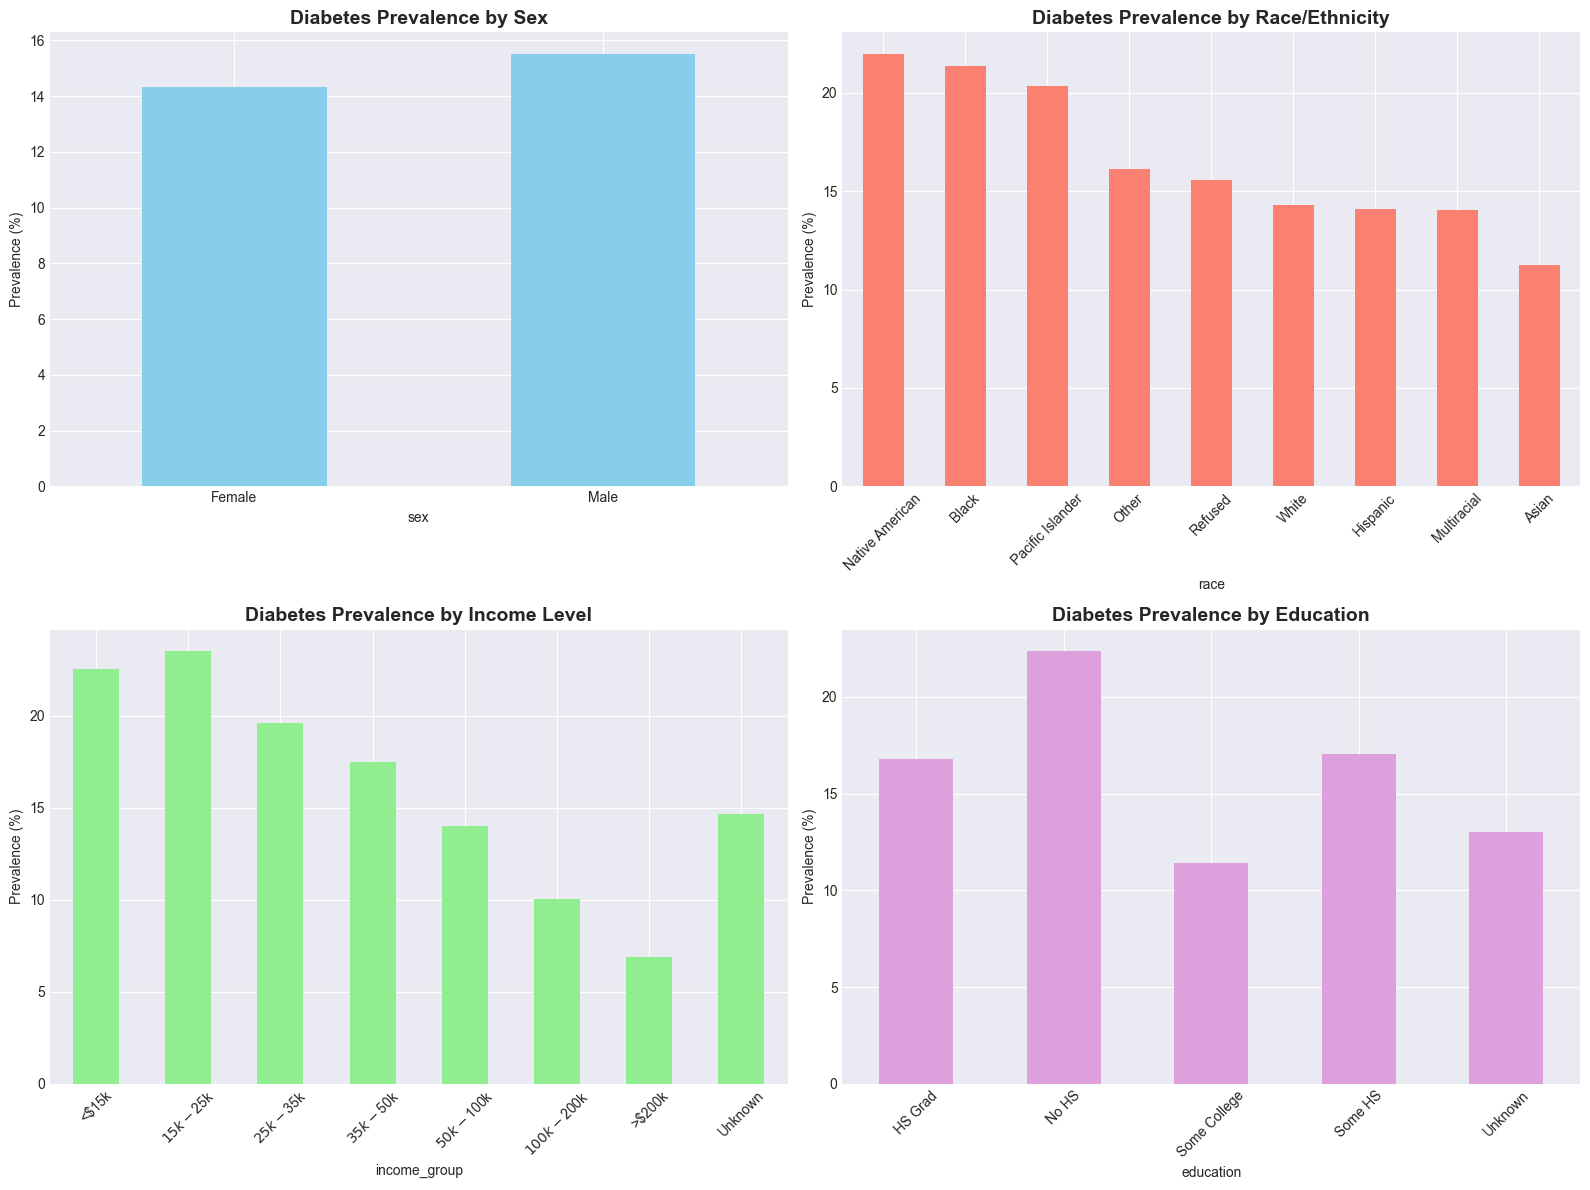

In [60]:
# Visualize demographics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sex
(df.groupby('sex')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Diabetes Prevalence by Sex', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Prevalence (%)')
axes[0,0].tick_params(axis='x', rotation=0)

# Race
(df.groupby('race')['has_diabetes'].mean().sort_values(ascending=False) * 100).plot(kind='bar', ax=axes[0,1], color='salmon')
axes[0,1].set_title('Diabetes Prevalence by Race/Ethnicity', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Prevalence (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Income
income_order = ['<$15k', '$15k-$25k', '$25k-$35k', '$35k-$50k', '$50k-$100k', '$100k-$200k', '>$200k', 'Unknown']
income_prev = df.groupby('income_group')['has_diabetes'].mean().reindex(income_order) * 100
income_prev.plot(kind='bar', ax=axes[1,0], color='lightgreen')
axes[1,0].set_title('Diabetes Prevalence by Income Level', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Prevalence (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Education
educ_map = {1: 'No HS', 2: 'Some HS', 3: 'HS Grad', 4: 'Some College', 9: 'Unknown'}
df['education'] = df['_EDUCAG'].map(educ_map)
(df.groupby('education')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[1,1], color='plum')
axes[1,1].set_title('Diabetes Prevalence by Education', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Prevalence (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.4 Behavior & lifestyle patterns (Exercise, Smoking, Alcohol)

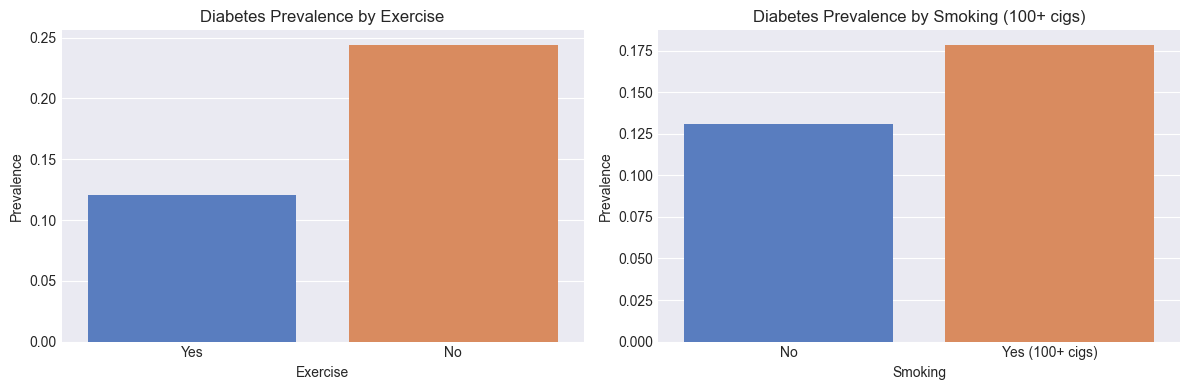

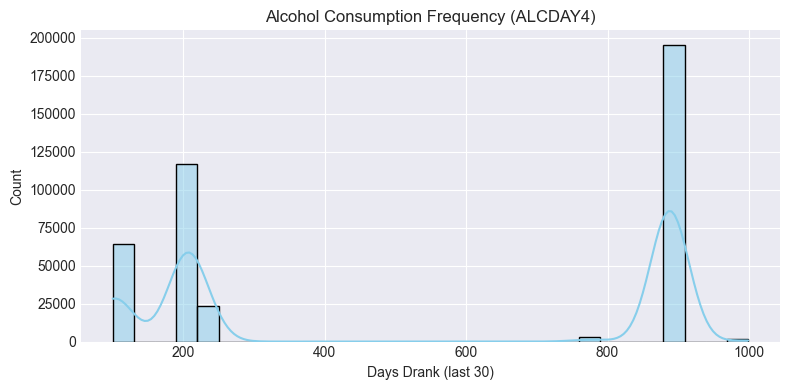

In [61]:
df_sub = df[df['has_diabetes'].notna()].copy()
exer_map = {1: 'Yes', 2: 'No'}
smoke_map = {1: 'Yes (100+ cigs)', 2: 'No'}

if df_sub['EXERANY2'].dtype != 'O':
    df_sub['exercise'] = df_sub['EXERANY2'].map(exer_map)
else:
    df_sub['exercise'] = df_sub['EXERANY2']

if df_sub['SMOKE100'].dtype != 'O':
    df_sub['smoke100'] = df_sub['SMOKE100'].map(smoke_map)
else:
    df_sub['smoke100'] = df_sub['SMOKE100']

fig_top, axes_top = plt.subplots(1, 2, figsize=(12, 4))

# 1) Exercise vs Diabetes
sns.barplot(
    data=df_sub, x='exercise', y='has_diabetes',
    estimator=np.mean, ci=None, ax=axes_top[0], palette='muted'
)
axes_top[0].set_title('Diabetes Prevalence by Exercise')
axes_top[0].set_xlabel('Exercise'); axes_top[0].set_ylabel('Prevalence')

# 2) Smoking vs Diabetes
sns.barplot(
    data=df_sub, x='smoke100', y='has_diabetes',
    estimator=np.mean, ci=None, ax=axes_top[1], palette='muted'
)
axes_top[1].set_title('Diabetes Prevalence by Smoking (100+ cigs)')
axes_top[1].set_xlabel('Smoking'); axes_top[1].set_ylabel('Prevalence')

fig_top.tight_layout()

if 'ALCDAY4' in df_sub.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_sub['ALCDAY4'].dropna(), bins=30, kde=True, color='skyblue')
    plt.title('Alcohol Consumption Frequency (ALCDAY4)')
    plt.xlabel('Days Drank (last 30)')
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()

## 5. NOVEL FACTORS ⭐ 

### Age × Income diabetes prevalence (Subgroup novelty)

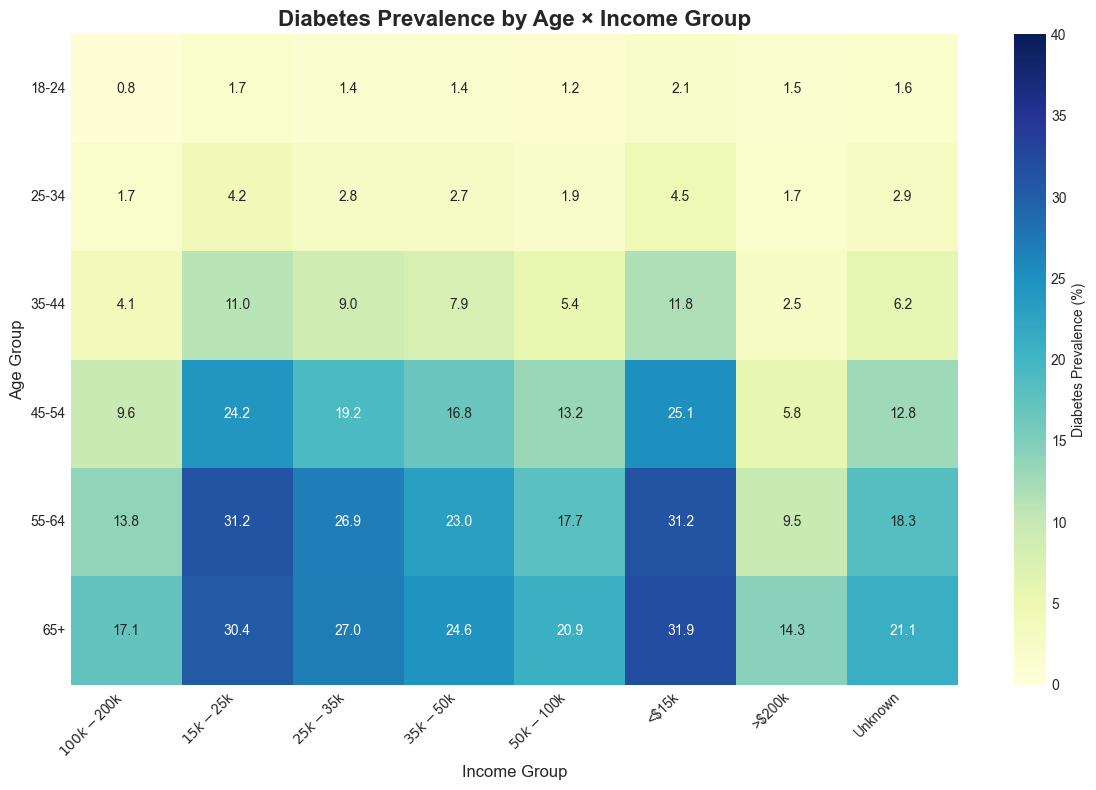

In [62]:
# --- Heatmap: Diabetes prevalence by Age × Income ---
df_sub = df[df['has_diabetes'].notna()].copy()

age_order = ['18-24','25-34','35-44','45-54','55-64','65+']
income_order = ['<$15k', '$15k-$25k', '$25k-$35k', '$35k-$50k',
                '$50k-$100k', '$100k-$200k', '>$200k', 'Unknown']

pivot = (
    df_sub
    .pivot_table(index='age_group', columns='income_group',
                 values='has_diabetes', aggfunc='mean') * 100
)

# Drop rows/cols that are completely empty
pivot = pivot.dropna(how='all').dropna(axis=1, how='all')

# --- Plot ---
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot,
    annot=True, fmt=".1f", cmap='YlGnBu',
    vmin=0, vmax=40,                     # fix color range for better comparison
    cbar_kws={'label': 'Diabetes Prevalence (%)'}
)
plt.title("Diabetes Prevalence by Age × Income Group", fontsize=16, fontweight='bold')
plt.xlabel("Income Group", fontsize=12)
plt.ylabel("Age Group", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Mental Health Analysis 

In [63]:
# Depression analysis
print("="*80)
print("MENTAL HEALTH FACTORS")
print("="*80)

# Depression (ADDEPEV3)
depression_map = {1: 'Yes', 2: 'No'}
df['has_depression'] = df['ADDEPEV3'].map(depression_map)

print("\nDepression by Diabetes Status (%):")
print((pd.crosstab(df['has_depression'], df['diabetes_status'], normalize='columns') * 100).round(2))

print("\nDiabetes Prevalence by Depression Status (%):")
print((df.groupby('has_depression')['has_diabetes'].mean() * 100).round(2))

MENTAL HEALTH FACTORS

Depression by Diabetes Status (%):
diabetes_status  Diabetes  Gestational  No Diabetes  Prediabetes
has_depression                                                  
No                  74.63        68.21        79.92        72.46
Yes                 25.37        31.79        20.08        27.54

Diabetes Prevalence by Depression Status (%):
has_depression
No     14.04
Yes    18.09
Name: has_diabetes, dtype: float64


In [64]:
# Loneliness analysis
loneliness_map = {
    1: 'Always', 2: 'Usually', 3: 'Sometimes', 
    4: 'Rarely', 5: 'Never'
}
df['loneliness'] = df['SDLONELY'].map(loneliness_map)

print("Loneliness Frequency:")
print(df['loneliness'].value_counts())

print("\nDiabetes Prevalence by Loneliness (%):")
loneliness_order = ['Always', 'Usually', 'Sometimes', 'Rarely', 'Never']
lonely_prev = df.groupby('loneliness')['has_diabetes'].mean().reindex(loneliness_order) * 100
print(lonely_prev.round(2))

Loneliness Frequency:
loneliness
Never        76943
Rarely       65222
Sometimes    47449
Usually       7455
Always        5064
Name: count, dtype: int64

Diabetes Prevalence by Loneliness (%):
loneliness
Always       23.10
Usually      17.12
Sometimes    16.88
Rarely       13.22
Never        15.77
Name: has_diabetes, dtype: float64


In [65]:
# Mental health days
print("Mental Health Days (past 30 days) - Summary Statistics:")
print(df['MENTHLTH'].describe())

# Create categories
def categorize_mental_health_days(x):
    if pd.isna(x) or x == 88:  # 88 = None
        return '0 days'
    elif x <= 5:
        return '1-5 days'
    elif x <= 13:
        return '6-13 days'
    elif x <= 30:
        return '14-30 days'
    else:
        return np.nan

df['mental_health_days'] = df['MENTHLTH'].apply(categorize_mental_health_days)

print("\nDiabetes Prevalence by Mental Health Days (%):")
mh_order = ['0 days', '1-5 days', '6-13 days', '14-30 days']
mh_prev = df.groupby('mental_health_days')['has_diabetes'].mean().reindex(mh_order) * 100
print(mh_prev.round(2))

Mental Health Days (past 30 days) - Summary Statistics:
count    457667.000000
mean         57.728739
std          38.072038
min           1.000000
25%          10.000000
50%          88.000000
75%          88.000000
max          99.000000
Name: MENTHLTH, dtype: float64

Diabetes Prevalence by Mental Health Days (%):
mental_health_days
0 days        15.20
1-5 days      12.01
6-13 days     13.39
14-30 days    17.88
Name: has_diabetes, dtype: float64


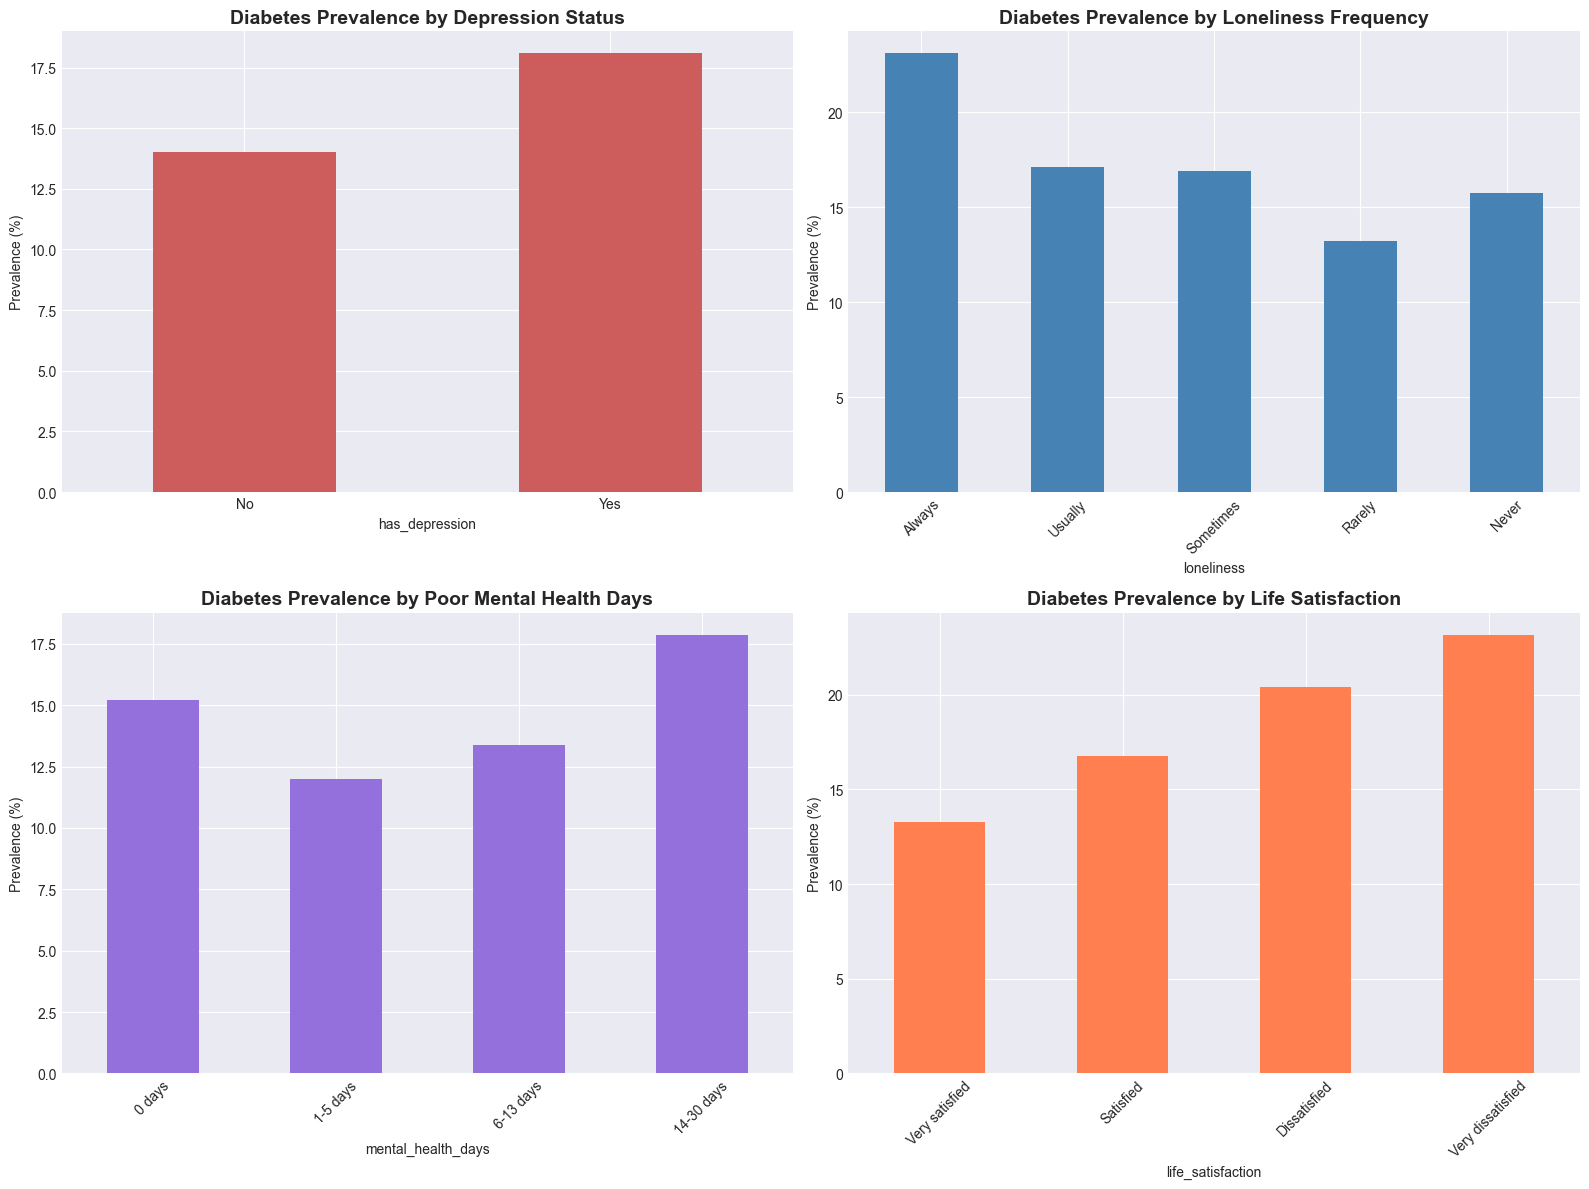

In [66]:
# Visualize mental health factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Depression
(df.groupby('has_depression')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[0,0], color='indianred')
axes[0,0].set_title('Diabetes Prevalence by Depression Status', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Prevalence (%)')
axes[0,0].tick_params(axis='x', rotation=0)

# Loneliness
lonely_prev.plot(kind='bar', ax=axes[0,1], color='steelblue')
axes[0,1].set_title('Diabetes Prevalence by Loneliness Frequency', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Prevalence (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Mental health days
mh_prev.plot(kind='bar', ax=axes[1,0], color='mediumpurple')
axes[1,0].set_title('Diabetes Prevalence by Poor Mental Health Days', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Prevalence (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Life satisfaction
satisfaction_map = {
    1: 'Very satisfied', 2: 'Satisfied', 3: 'Dissatisfied', 
    4: 'Very dissatisfied'
}
df['life_satisfaction'] = df['LSATISFY'].map(satisfaction_map)
sat_order = ['Very satisfied', 'Satisfied', 'Dissatisfied', 'Very dissatisfied']
sat_prev = df.groupby('life_satisfaction')['has_diabetes'].mean().reindex(sat_order) * 100
sat_prev.plot(kind='bar', ax=axes[1,1], color='coral')
axes[1,1].set_title('Diabetes Prevalence by Life Satisfaction', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Prevalence (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. NOVEL FACTORS: Social Determinants of Health ⭐

In [67]:
print("="*80)
print("SOCIAL DETERMINANTS OF HEALTH")
print("="*80)

# Food insecurity
food_security_map = {
    1: 'Always worried', 2: 'Usually worried', 3: 'Sometimes worried',
    4: 'Rarely worried', 5: 'Never worried'
}
df['food_insecurity'] = df['SDHFOOD1'].map(food_security_map)

print("\nFood Insecurity Distribution:")
print(df['food_insecurity'].value_counts())

print("\nDiabetes Prevalence by Food Security (%):")
food_order = ['Always worried', 'Usually worried', 'Sometimes worried', 'Rarely worried', 'Never worried']
food_prev = df.groupby('food_insecurity')['has_diabetes'].mean().reindex(food_order) * 100
print(food_prev.round(2))

SOCIAL DETERMINANTS OF HEALTH

Food Insecurity Distribution:
food_insecurity
Never worried        159988
Rarely worried        17479
Sometimes worried     15376
Always worried         4675
Usually worried        4022
Name: count, dtype: int64

Diabetes Prevalence by Food Security (%):
food_insecurity
Always worried       24.80
Usually worried      21.02
Sometimes worried    21.51
Rarely worried       17.58
Never worried        14.21
Name: has_diabetes, dtype: float64


In [68]:
# Financial stress - bills
bills_map = {
    1: 'Very confident', 2: 'Somewhat confident', 
    3: 'Not very confident', 4: 'Not confident at all'
}
df['bills_confidence'] = df['SDHBILLS'].map(bills_map)

print("Ability to Pay Bills - Distribution:")
print(df['bills_confidence'].value_counts())

print("\nDiabetes Prevalence by Bill Payment Confidence (%):")
bills_order = ['Very confident', 'Somewhat confident', 'Not very confident', 'Not confident at all']
bills_prev = df.groupby('bills_confidence')['has_diabetes'].mean().reindex(bills_order) * 100
print(bills_prev.round(2))

Ability to Pay Bills - Distribution:
bills_confidence
Somewhat confident    182709
Very confident         18738
Name: count, dtype: int64

Diabetes Prevalence by Bill Payment Confidence (%):
bills_confidence
Very confident          19.44
Somewhat confident      15.02
Not very confident        NaN
Not confident at all      NaN
Name: has_diabetes, dtype: float64


In [69]:
# Transportation barriers
transport_map = {1: 'Yes - lack transport', 2: 'No - have transport'}
df['lacks_transport'] = df['SDHTRNSP'].map(transport_map)

print("Transportation Access:")
print(df['lacks_transport'].value_counts())

print("\nDiabetes Prevalence by Transportation Access (%):")
print((df.groupby('lacks_transport')['has_diabetes'].mean() * 100).round(2))

# SNAP/Food stamps
snap_map = {1: 'Yes - received SNAP', 2: 'No'}
df['received_snap'] = df['FOODSTMP'].map(snap_map)

print("\nDiabetes Prevalence by SNAP Receipt (%):")
print((df.groupby('received_snap')['has_diabetes'].mean() * 100).round(2))

Transportation Access:
lacks_transport
No - have transport     187734
Yes - lack transport     13509
Name: count, dtype: int64

Diabetes Prevalence by Transportation Access (%):
lacks_transport
No - have transport     15.05
Yes - lack transport    21.07
Name: has_diabetes, dtype: float64

Diabetes Prevalence by SNAP Receipt (%):
received_snap
No                     14.63
Yes - received SNAP    23.64
Name: has_diabetes, dtype: float64


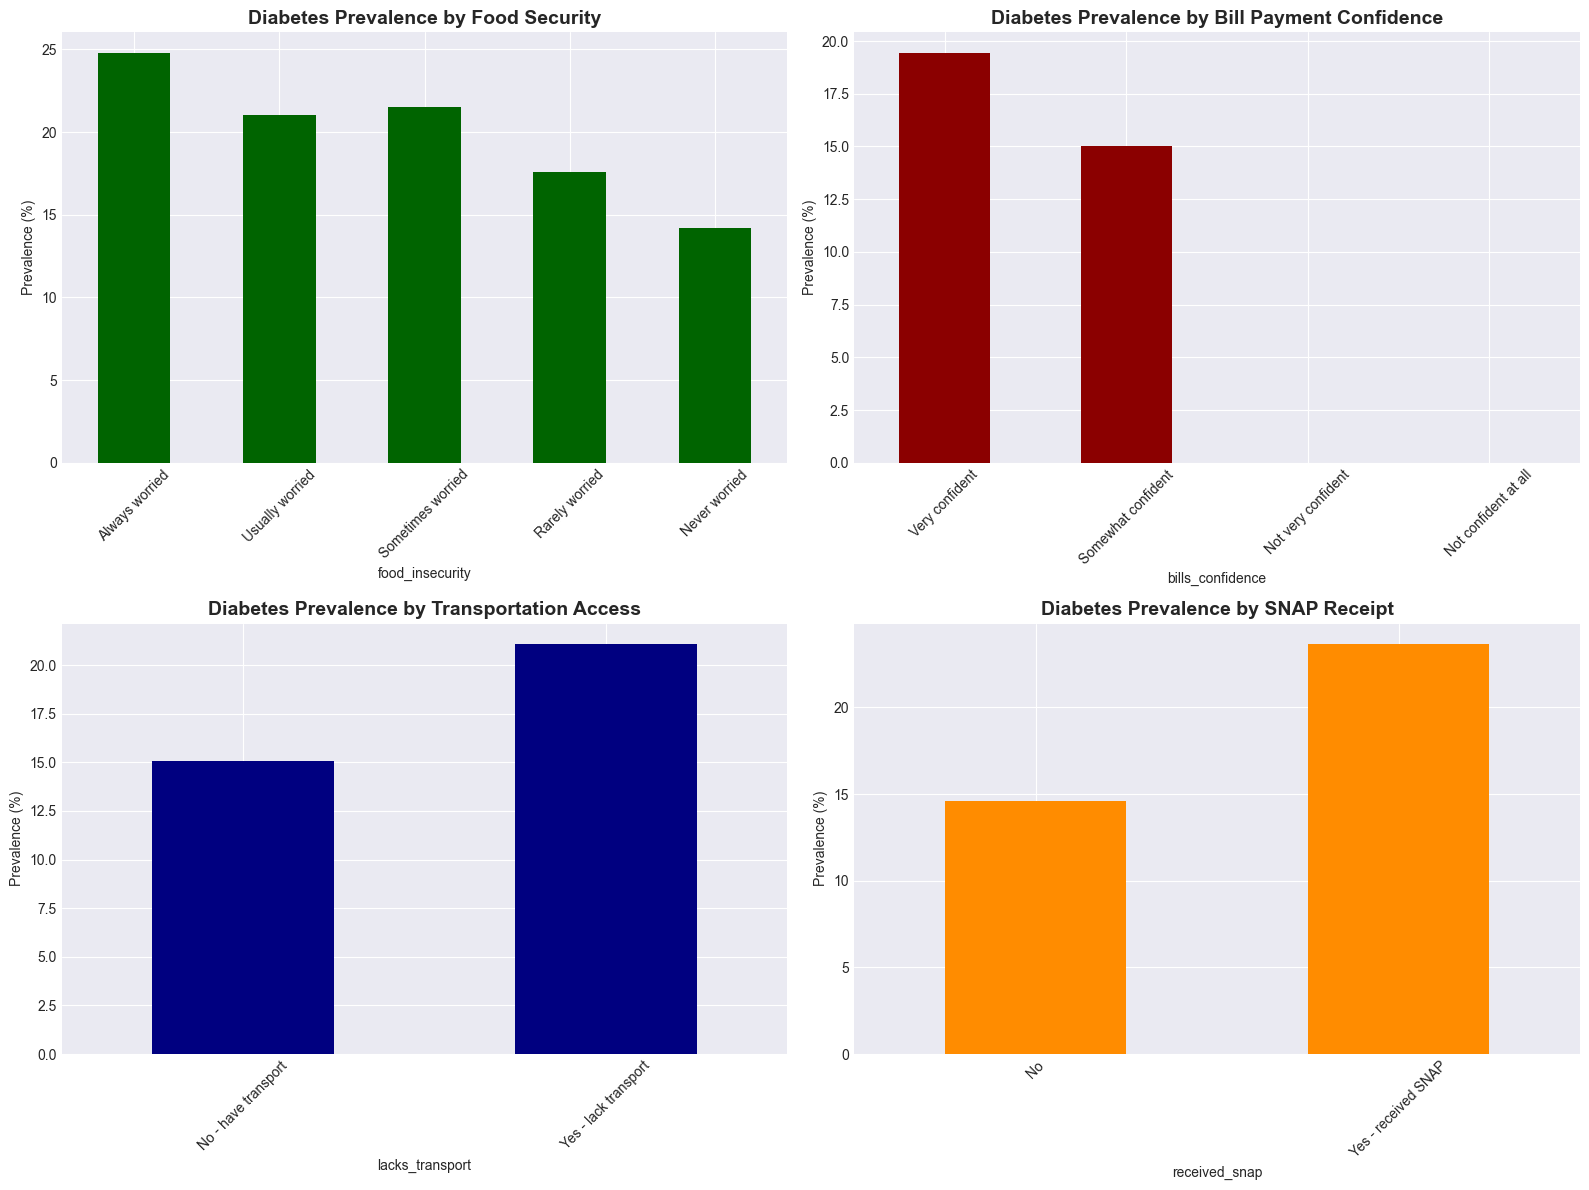

In [70]:
# Visualize SDOH factors
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Food insecurity
food_prev.plot(kind='bar', ax=axes[0,0], color='darkgreen')
axes[0,0].set_title('Diabetes Prevalence by Food Security', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Prevalence (%)')
axes[0,0].tick_params(axis='x', rotation=45)

# Bills confidence
bills_prev.plot(kind='bar', ax=axes[0,1], color='darkred')
axes[0,1].set_title('Diabetes Prevalence by Bill Payment Confidence', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Prevalence (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Transportation
(df.groupby('lacks_transport')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[1,0], color='navy')
axes[1,0].set_title('Diabetes Prevalence by Transportation Access', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Prevalence (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# SNAP
(df.groupby('received_snap')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[1,1], color='darkorange')
axes[1,1].set_title('Diabetes Prevalence by SNAP Receipt', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Prevalence (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. NOVEL FACTORS: Healthcare Access Barriers ⭐

In [71]:
print("="*80)
print("HEALTHCARE ACCESS BARRIERS")
print("="*80)

# Could not afford to see doctor
medcost_map = {1: 'Yes - cost barrier', 2: 'No cost barrier'}
df['cost_barrier'] = df['MEDCOST1'].map(medcost_map)

print("\nCould Not See Doctor Due to Cost:")
print(df['cost_barrier'].value_counts())

print("\nDiabetes Prevalence by Cost Barrier (%):")
print((df.groupby('cost_barrier')['has_diabetes'].mean() * 100).round(2))

# Have personal doctor
doctor_map = {
    1: 'Yes, only one', 2: 'More than one', 
    3: 'No personal doctor'
}
df['has_doctor'] = df['PERSDOC3'].map(doctor_map)

print("\nDiabetes Prevalence by Personal Doctor Status (%):")
print((df.groupby('has_doctor')['has_diabetes'].mean() * 100).round(2))

HEALTHCARE ACCESS BARRIERS

Could Not See Doctor Due to Cost:
cost_barrier
No cost barrier       412634
Yes - cost barrier     43363
Name: count, dtype: int64

Diabetes Prevalence by Cost Barrier (%):
cost_barrier
No cost barrier       14.94
Yes - cost barrier    14.27
Name: has_diabetes, dtype: float64

Diabetes Prevalence by Personal Doctor Status (%):
has_doctor
More than one         19.31
No personal doctor     4.32
Yes, only one         14.63
Name: has_diabetes, dtype: float64


In [72]:
# Health insurance coverage
insurance_map = {1: 'Yes - insured', 2: 'No - uninsured'}
df['has_insurance'] = df['_HLTHPL2'].map(insurance_map)

print("Health Insurance Coverage:")
print(df['has_insurance'].value_counts())

print("\nDiabetes Prevalence by Insurance Status (%):")
print((df.groupby('has_insurance')['has_diabetes'].mean() * 100).round(2))

# Time since checkup
checkup_map = {
    1: 'Within past year', 2: '1-2 years ago', 
    3: '2-5 years ago', 4: '5+ years ago', 8: 'Never'
}
df['last_checkup'] = df['CHECKUP1'].map(checkup_map)

print("\nDiabetes Prevalence by Time Since Checkup (%):")
checkup_order = ['Within past year', '1-2 years ago', '2-5 years ago', '5+ years ago', 'Never']
checkup_prev = df.groupby('last_checkup')['has_diabetes'].mean().reindex(checkup_order) * 100
print(checkup_prev.round(2))

Health Insurance Coverage:
has_insurance
Yes - insured     413720
No - uninsured     25406
Name: count, dtype: int64

Diabetes Prevalence by Insurance Status (%):
has_insurance
No - uninsured     7.54
Yes - insured     15.38
Name: has_diabetes, dtype: float64

Diabetes Prevalence by Time Since Checkup (%):
last_checkup
Within past year    17.46
1-2 years ago        4.85
2-5 years ago        3.00
5+ years ago         2.41
Never                3.96
Name: has_diabetes, dtype: float64


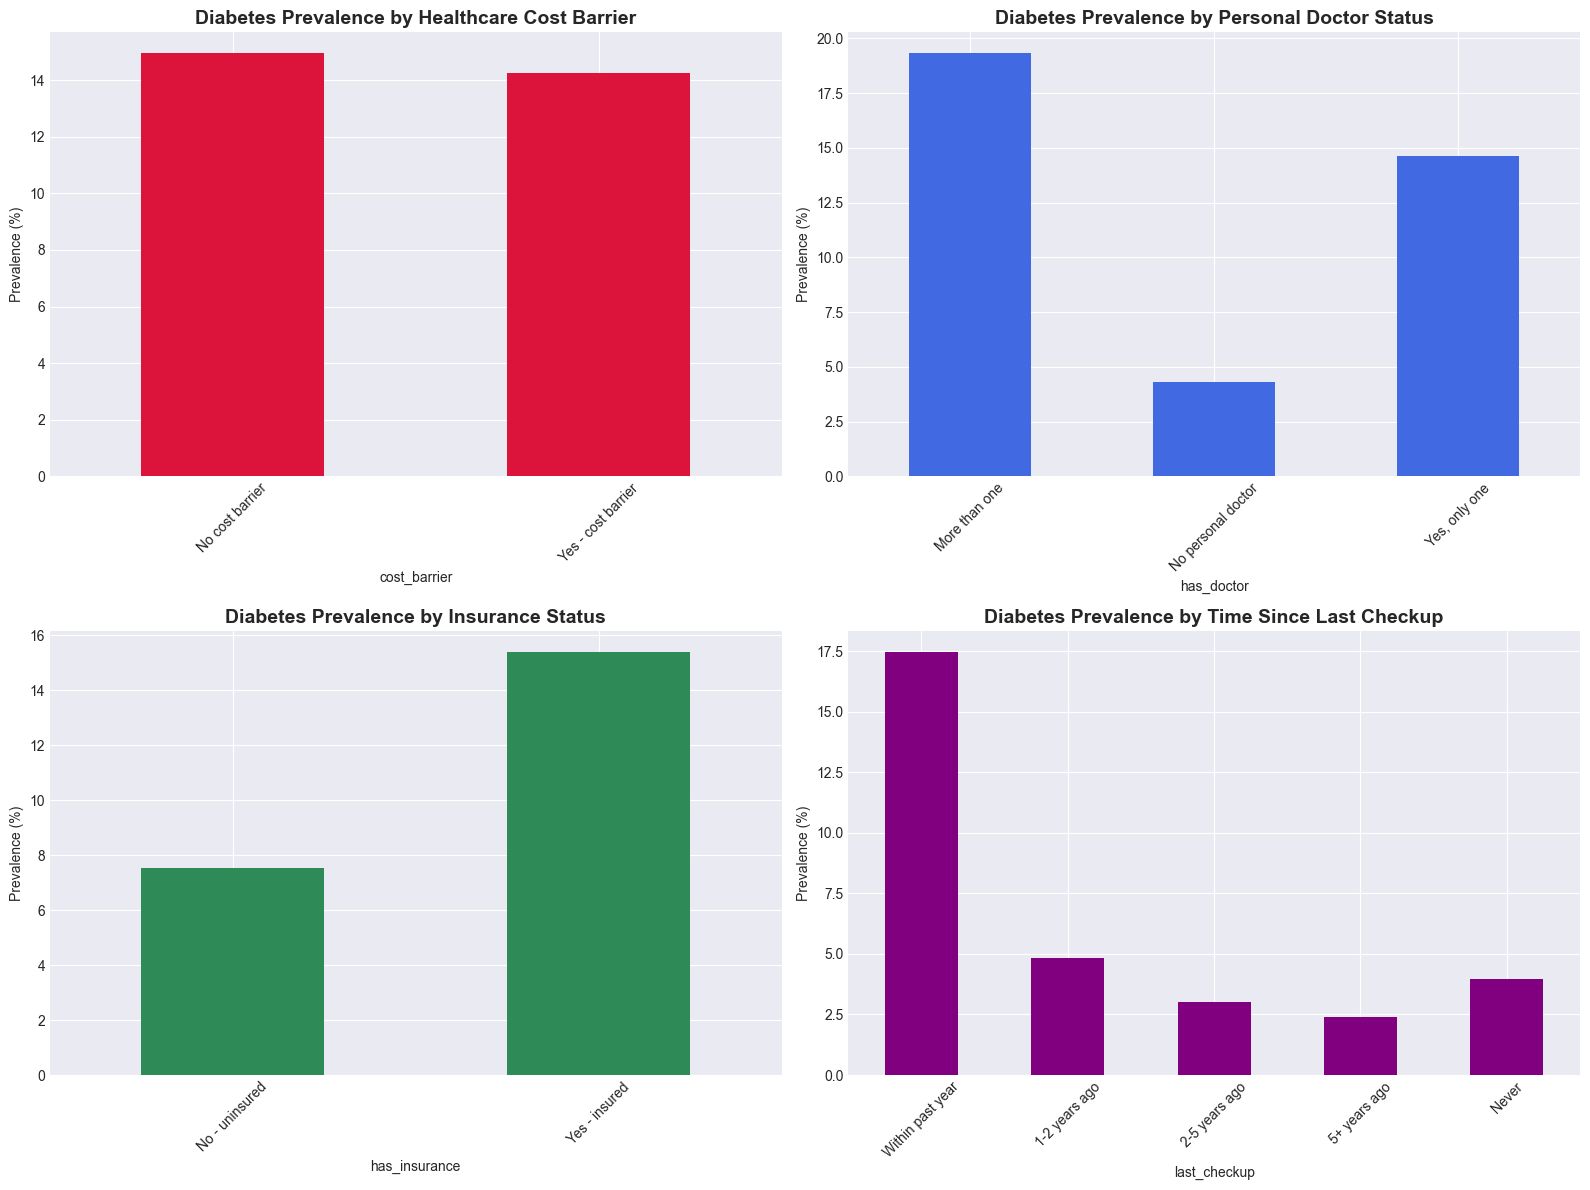

In [73]:
# Visualize healthcare access
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Cost barrier
(df.groupby('cost_barrier')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[0,0], color='crimson')
axes[0,0].set_title('Diabetes Prevalence by Healthcare Cost Barrier', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Prevalence (%)')
axes[0,0].tick_params(axis='x', rotation=45)

# Personal doctor
(df.groupby('has_doctor')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[0,1], color='royalblue')
axes[0,1].set_title('Diabetes Prevalence by Personal Doctor Status', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Prevalence (%)')
axes[0,1].tick_params(axis='x', rotation=45)

# Insurance
(df.groupby('has_insurance')['has_diabetes'].mean() * 100).plot(kind='bar', ax=axes[1,0], color='seagreen')
axes[1,0].set_title('Diabetes Prevalence by Insurance Status', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Prevalence (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Last checkup
checkup_prev.plot(kind='bar', ax=axes[1,1], color='purple')
axes[1,1].set_title('Diabetes Prevalence by Time Since Last Checkup', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Prevalence (%)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Summary: Key Findings from Novel Risk Factors

In [74]:
print("="*80)
print("KEY FINDINGS SUMMARY")
print("="*80)

print("\n1. DIABETES PREVALENCE:")
diabetes_prev = (df['DIABETE4'] == 1).sum() / len(df[df['DIABETE4'].isin([1, 3])]) * 100
print(f"   Overall prevalence: {diabetes_prev:.2f}%")

print("\n2. TRADITIONAL RISK FACTORS:")
obese_prev = df[df['bmi_category']=='Obese']['has_diabetes'].mean()*100
age65_prev = df[df['age_group']=='65+']['has_diabetes'].mean()*100
low_income_prev = df[df['income_group']=='<$15k']['has_diabetes'].mean()*100
print(f"   - Obesity: {obese_prev:.2f}% prevalence")
print(f"   - Age 65+: {age65_prev:.2f}% prevalence")
print(f"   - Lowest income (<$15k): {low_income_prev:.2f}% prevalence")

print("\n3. NOVEL MENTAL HEALTH FINDINGS:")
dep_yes = df[df['has_depression']=='Yes']['has_diabetes'].mean()*100
dep_no = df[df['has_depression']=='No']['has_diabetes'].mean()*100
print(f"   - Depression: {dep_yes:.2f}% vs No depression: {dep_no:.2f}%")
print(f"   - Relative risk: {dep_yes/dep_no:.2f}x higher with depression")

print("\n4. SOCIAL DETERMINANTS FINDINGS:")
food_always = df[df['food_insecurity']=='Always worried']['has_diabetes'].mean()*100
food_never = df[df['food_insecurity']=='Never worried']['has_diabetes'].mean()*100
if not pd.isna(food_always) and not pd.isna(food_never):
    print(f"   - Always worried about food: {food_always:.2f}%")
    print(f"   - Never worried about food: {food_never:.2f}%")
    print(f"   - Relative risk: {food_always/food_never:.2f}x higher with food insecurity")

print("\n5. HEALTHCARE ACCESS FINDINGS:")
cost_yes = df[df['cost_barrier']=='Yes - cost barrier']['has_diabetes'].mean()*100
cost_no = df[df['cost_barrier']=='No cost barrier']['has_diabetes'].mean()*100
if not pd.isna(cost_yes) and not pd.isna(cost_no):
    print(f"   - Cost barrier to care: {cost_yes:.2f}%")
    print(f"   - No cost barrier: {cost_no:.2f}%")
    print(f"   - Relative risk: {cost_yes/cost_no:.2f}x higher with cost barrier")

print("\n" + "="*80)
print("CONCLUSION: Mental health, social determinants, and healthcare access")
print("show strong associations with diabetes, suggesting they are important")
print("yet underexplored risk factors worthy of further investigation.")
print("="*80)

KEY FINDINGS SUMMARY

1. DIABETES PREVALENCE:
   Overall prevalence: 14.89%

2. TRADITIONAL RISK FACTORS:
   - Obesity: 23.55% prevalence
   - Age 65+: 22.60% prevalence
   - Lowest income (<$15k): 22.50% prevalence

3. NOVEL MENTAL HEALTH FINDINGS:
   - Depression: 18.09% vs No depression: 14.04%
   - Relative risk: 1.29x higher with depression

4. SOCIAL DETERMINANTS FINDINGS:
   - Always worried about food: 24.80%
   - Never worried about food: 14.21%
   - Relative risk: 1.74x higher with food insecurity

5. HEALTHCARE ACCESS FINDINGS:
   - Cost barrier to care: 14.27%
   - No cost barrier: 14.94%
   - Relative risk: 0.95x higher with cost barrier

CONCLUSION: Mental health, social determinants, and healthcare access
show strong associations with diabetes, suggesting they are important
yet underexplored risk factors worthy of further investigation.


## 9. Next Steps for Analysis

Based on these exploratory findings, recommended next steps:

1. **Multivariable Logistic Regression**: Model diabetes risk adjusting for traditional + novel factors
2. **Mediation Analysis**: Test if healthcare access mediates SDOH → diabetes relationship
3. **Interaction Analysis**: Examine if mental health moderates the effect of SDOH
4. **Machine Learning**: Random forest/XGBoost for variable importance ranking
5. **Stratified Analysis**: Examine patterns within demographic subgroups
6. **Missing Data Handling**: Implement multiple imputation for missing values

### Research Questions to Pursue:
- Does food insecurity predict diabetes risk independent of income/education?
- Is the depression-diabetes association bidirectional or unidirectional?
- Do healthcare barriers explain racial/ethnic disparities in diabetes?
- Does social isolation increase diabetes risk through behavioral or physiological pathways?